### Scatter plot $P_H^0$ and $T_{eq}$ for comparison with Figure 6 of Falco+24

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

mpl.rcParams.update({'font.size': 12})
mpl.rcParams['axes.formatter.useoffset'] = False

In [2]:
import utils.load_grid as lg
from utils.load_cmaps import *

In [3]:
pgrid_dir = "data/article_data/jgr_grid_final"
cases = lg.get_cases(pgrid_dir)

In [4]:
helps, hvars = lg.load_helpfiles(cases)

Helpfiles: 100%|██████████| 1029/1029 [00:25<00:00, 40.98it/s]


In [9]:
%matplotlib widget

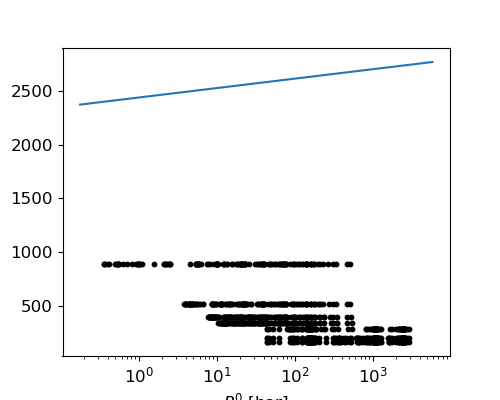

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(5,4))

# Our data
p_arr= []
T_arr = []
for i in range(len(cases)):
    # get pp of H
    p_H2  = lg.access_hvars(hvars,"H2_atm_bar",-1)[i]
    p_H2O = lg.access_hvars(hvars,"H2O_atm_bar",-1)[i]
    p_CH4 = lg.access_hvars(hvars,"CH4_atm_bar",-1)[i]
    p_arr.append(0.5 * p_H2 + 0.5 * p_H2O + 0.25 * p_CH4)

    # get T_eqm
    T_arr.append(lg.access_hvars(hvars,"T_eqm",-1)[i])
ax.scatter(p_arr, T_arr, color='k', s=10)

# Ther fit
def func_bdry(p):
    return 87.72 * np.log10(p) + 2437.93
ps = np.linspace(np.amin(p_arr) * 0.5, np.amax(p_arr) * 2.0, 200)
ax.plot(ps, func_bdry(ps))

ax.set_ylabel(r"$T_{\text{eq}}$ [K]")
ax.set_xlabel(r"$P_{\text{H}}^0$ [bar]")
ax.set_xscale("log")

plt.show()